# [ANALISIS PEFORMA AKADEMIK SISWA]
(Dataset : student acedemic peformance (kaggle) , https://www.kaggle.com/datasets/sonalshinde123/student-academic-performance-dataset?resource=download)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, r2_score, mean_squared_error,
                            mean_absolute_error)



In [ ]:
df_students = pd.read_csv("student_perform.csv" , delimiter=","  , header="infer")
df_students = df_students.set_index("Student_ID")
# df_students = df_students.drop(columns=['Student_ID'])
df_students.head()

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
Student_ID,,,,,,
S1000,84,30,36,7,3,72
S1001,91,24,38,6,3,56
S1002,73,29,26,7,3,56
S1003,80,36,35,7,3,74
S1004,84,31,37,8,3,66


In [11]:
df_students.describe()

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,84.891500,32.115500,32.464500,7.507000,2.823500,64.855000
std,7.758855,4.563504,4.522827,1.021015,0.608714,11.341265
min,52.000000,18.000000,16.000000,4.000000,1.000000,25.000000
25%,80.000000,29.000000,29.000000,7.000000,2.000000,58.000000
50%,85.000000,32.000000,33.000000,8.000000,3.000000,65.000000
75%,90.000000,35.000000,36.000000,8.000000,3.000000,73.000000
max,100.000000,40.000000,40.000000,10.000000,5.000000,100.000000


In [18]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, S1000 to S2999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Attendance (%)                 2000 non-null   int64
 1   Internal Test 1 (out of 40)    2000 non-null   int64
 2   Internal Test 2 (out of 40)    2000 non-null   int64
 3   Assignment Score (out of 10)   2000 non-null   int64
 4   Daily Study Hours              2000 non-null   int64
 5   Final Exam Marks (out of 100)  2000 non-null   int64
dtypes: int64(6)
memory usage: 109.4+ KB


In [19]:
corr = df_students.corr()
print(corr)

                               Attendance (%)  Internal Test 1 (out of 40)  \
Attendance (%)                       1.000000                     0.505033   
Internal Test 1 (out of 40)          0.505033                     1.000000   
Internal Test 2 (out of 40)          0.494560                     0.263400   
Assignment Score (out of 10)         0.432373                     0.568047   
Daily Study Hours                    0.298767                     0.213539   
Final Exam Marks (out of 100)        0.725644                     0.689227   

                               Internal Test 2 (out of 40)  \
Attendance (%)                                    0.494560   
Internal Test 1 (out of 40)                       0.263400   
Internal Test 2 (out of 40)                       1.000000   
Assignment Score (out of 10)                      0.541970   
Daily Study Hours                                 0.225670   
Final Exam Marks (out of 100)                     0.691049   

                  

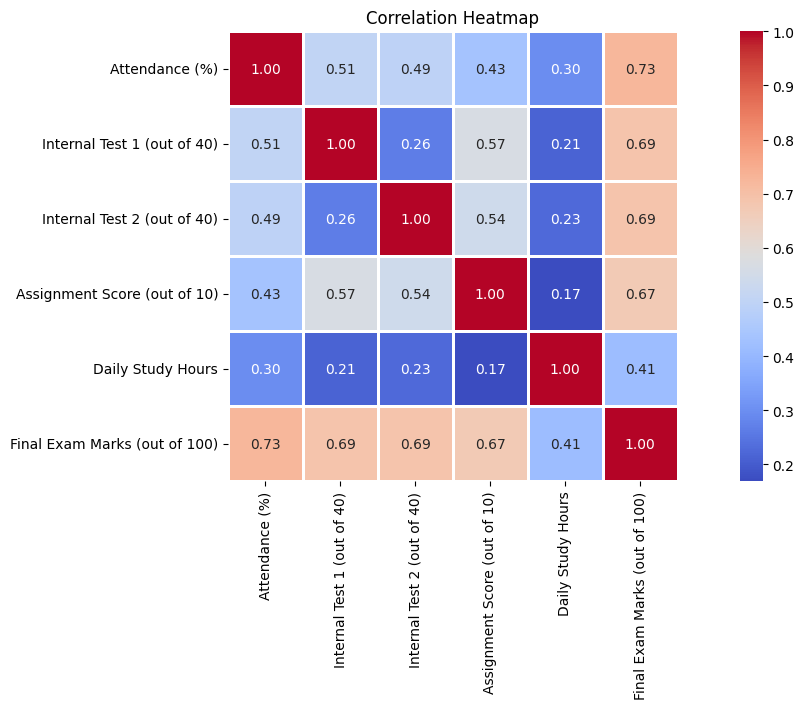

In [ ]:
plt.figure(figsize=(12.8,7.2))
sns.heatmap(corr, annot=True , fmt='.2f' , cmap='coolwarm' , square=True , linewidths=1)
plt.title("Correlation Heatmap antar variable")
plt.tight_layout()
plt.show()

In [24]:
X = df_students.drop(columns=['Final Exam Marks (out of 100)'])
Y = df_students['Final Exam Marks (out of 100)']

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [25]:
model1 = LinearRegression()
model1.fit(X_train , Y_train)
pred1 = model1.predict(X_test)
print("LR R2:" , r2_score(Y_test , pred1))
print("LR MAE:" , np.sqrt(mean_squared_error(Y_test , pred1)))

LR R2: 0.8297242264388041
LR MAE: 4.6179439138120335


In [26]:
model2 = RandomForestRegressor(n_estimators=100)
model2.fit(X_train , Y_train)
pred2 = model2.predict(X_test)
print("RF R2:" , r2_score(Y_test , pred2))
print("RF MAE:" , np.sqrt(mean_squared_error(Y_test , pred2)))

RF R2: 0.7832925727168607
RF MAE: 5.209656886582002


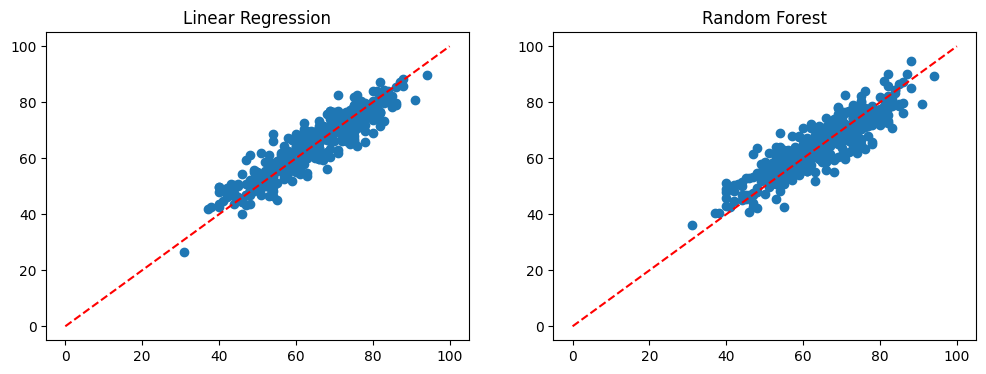

In [27]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(Y_test, pred1)
plt.plot([0, 100], [0, 100], 'r--')
plt.title('Linear Regression')

plt.subplot(1,2,2)
plt.scatter(Y_test, pred2)
plt.plot([0, 100], [0, 100], 'r--')
plt.title('Random Forest')

plt.show()

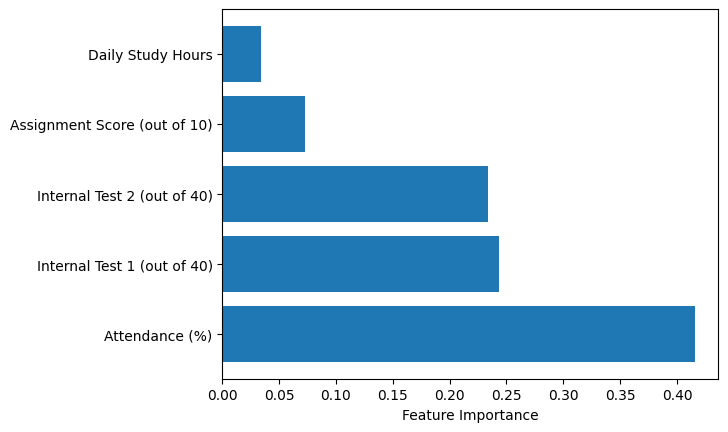

In [28]:
importance = model2.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.show()